<a href="https://colab.research.google.com/github/jihyoung-lee/Leaves/blob/main/Leaves_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [01:09<00:00, 63.3MB/s]
100% 2.70G/2.70G [01:09<00:00, 41.9MB/s]


In [ ]:
! unzip -q /content/new-plant-diseases-dataset

In [ ]:
/content/plantvillage dataset/color/Apple___healthy

In [ ]:
import os
# 기본경로
base_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# 훈련에 사용되는  이미지 경로
train_apple_dir = os.path.join(train_dir, 'Apple___healthy')
train_black_dir = os.path.join(train_dir, 'Apple___Black_rot')
print(train_apple_dir)
print(train_black_dir)

# 테스트에 사용되는 이미지 경로
validation_apple_dir = os.path.join(validation_dir, 'Apple___healthy')
validation_black_dir = os.path.join(validation_dir, 'Apple___Black_ro')
print(validation_apple_dir)
print(validation_black_dir)

/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy
/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot
/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___healthy
/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Black_ro


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#각각 다섯 개씩 출력
train_apple_fnames = os.listdir( train_apple_dir )
train_black_fnames = os.listdir( train_black_dir )

print(train_apple_fnames[:5])
print(train_black_fnames[:5])

['786696fd-ef1f-4e75-9ddd-250b628d9fe3___RS_HL 6199.JPG', '707ef394-bd7d-463c-86b8-4a13464bc6e0___RS_HL 7555.JPG', 'a8bcd8e0-29d1-4118-9117-838fc9174aa9___RS_HL 7618.JPG', '55e058db-7a66-4468-b6f8-a2e3fd4d567d___RS_HL 8128.JPG', 'ada1699c-0a91-44ea-bc2b-476147394421___RS_HL 5646_flipTB.JPG']
['3235339f-7b7b-423a-850a-0fd58ded4725___JR_FrgE.S 2791_270deg.JPG', '50afe8c7-d56e-4dd0-97b8-23a70ddca819___JR_FrgE.S 2750_new30degFlipLR.JPG', 'e1e8a707-d2b0-4cb6-ae56-c26a5e9ff016___JR_FrgE.S 8761_270deg.JPG', 'd240fec5-9b1e-4b36-a7df-d0007d0ebfcb___JR_FrgE.S 2929.JPG', 'c46d0eff-8a56-4655-9940-93a323c7154a___JR_FrgE.S 3033_new30degFlipLR.JPG']


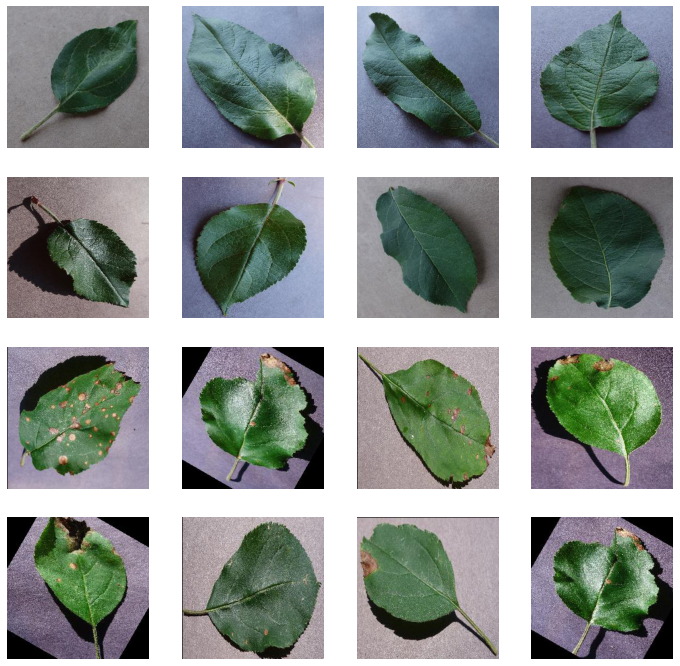

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_apple_pix = [os.path.join(train_apple_dir, fname)
                for fname in train_apple_fnames[ pic_index-8:pic_index]]

next_black_pix = [os.path.join(train_black_dir, fname)
                for fname in train_black_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_apple_pix+next_black_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, 
                                  zoom_range=0.2, width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(base_dir+'/train', target_size=(224, 224),
                                             batch_size = 32, class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(base_dir+'/valid', target_size=(224,224),
                                             batch_size=32, class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras

base_model = keras.applications.VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)
base_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
base_model.trainable = False
inputs = keras.Input(shape=(224,224,3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(38)(x)

vgg16_model = keras.Model(inputs, outputs, name='pretrained_vgg16')
vgg16_model.summary()

Model: "pretrained_vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 38)                19494     
Total params: 14,734,182
Trainable params: 19,494
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
vgg16_model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=[keras.metrics.CategoricalAccuracy()])

vgg16_history = vgg16_model.fit(train_set, steps_per_epoch=150, validation_data=valid_set,
                               epochs=25, validation_steps=100)

Epoch 1/25
 10/150 [=>............................] - ETA: 40:24 - loss: 3.9005 - categorical_accuracy: 0.0281